# Threshold Tuning and Probability Interpretation 

● Predict the probability of the positive class. <br>
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change. <br>
● Plot the ROC curve and mark optimal threshold. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, 
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    f1_score
)

In [9]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]  # probabilities for class 1 (benign)

thresholds are given in question

In [14]:
thresholds = [0.3, 0.5, 0.7]
for i in thresholds:
    y_pred = (y_probs>=i).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Threshold : ",i)
    print("Predicted values : ",y_pred)
    print("Confusion Matrix : ",cm)
    print("F1 Score : ",f1)
    print("\n")

Threshold :  0.3
Predicted values :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
Confusion Matrix :  [[39  4]
 [ 1 70]]
F1 Score :  0.9655172413793104


Threshold :  0.5
Predicted values :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
Confusion Matrix :  [[39  4]
 [ 1 70]]
F1 Score :  0.9655172413793104


Threshold :  0.7
Predicted values :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
Confusion Matrix :  [[41  2]
 [ 1 70]]
F1 Scor

 - TPR (True Positive Rate) : measures how well your model identifies actual positives
 - FPR (False Positive Rate): how often your model incorrectly labels negatives as positives
 - Thresholds : These are the cutoff values used to convert predicted probabilities into binary decisions

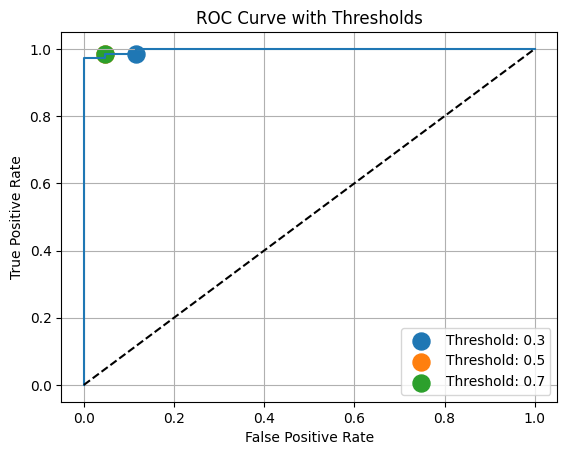

In [44]:

fpr, tpr, thresh = roc_curve(y_test, y_probs)
# plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.grid()

# print("Minimum thresh value",min(thresh))

for tval in [0.3, 0.5, 0.7]:
    idx = np.argmin(np.abs(thresh - tval))
    plt.scatter(fpr[idx], tpr[idx], label=f'Threshold: {tval}', s=150)
plt.legend()